# K-Means Clustering from Scratch

## Project Overview:

The "K-Means Clustering from Scratch" project demonstrates the implementation of the K-Means clustering algorithm in Python without relying on external libraries. K-Means is a popular unsupervised machine learning technique used to partition data into groups or clusters based on similarity.

## Implementation Details:

#### Custom K-Means Class:

- The project features a custom K-Means class for K-Means clustering.

#### Constructor:

- The K-Means class is initialized with parameters such as the number of clusters (K), the maximum number of iterations (max_iters), and whether to plot the steps (plot_steps).

#### Methods:

- predict(X): Clusters data points into K clusters.
- _get_cluster_labels(clusters): Assigns cluster labels to each data point.
- _create_clusters(centroids): Assigns data points to the closest centroids.
- _closest_centroid(sample, centroids): Identifies the closest centroid to a data point.
- _get_centroids(clusters): Calculates new centroids based on the data points in each cluster.
- _is_converged(centroids_old, centroids): Checks if the algorithm has converged.

#### Plotting:

- The project provides an optional visualization of data points and centroids during clustering.
- Data points are plotted in different colors to represent cluster assignments, and centroids are marked with "x."

### Code Overview:

- A custom K-Means class is developed to perform K-Means clustering without external libraries.
- The project generates synthetic data using make_blobs from scikit-learn.
- K-Means is applied to cluster the data into three clusters (centers=3).

#### Key Takeaways:

- This project showcases the ability to implement a fundamental machine-learning algorithm from scratch.
- The custom K-Means class is designed to be highly flexible, allowing the user to specify key parameters.
- The optional step-by-step visualization aids in understanding the clustering process.


One the whole, this practical project of mine demonstrates my strong grasp of machine learning algorithms, data processing, and coding skills in Python. It emphasizes my ability to work with numerical data and perform complex mathematical operations.

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pylab as plt
np.random.seed(42)

In [26]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a-b)**2))

In [1]:
clusters = [[] for _ in range(5)]
clusters

[[], [], [], [], []]

In [2]:
type(clusters)

list

In [5]:
X = np.random.randint(0,9, (10,3))
X

array([[5, 7, 7],
       [2, 3, 5],
       [4, 4, 2],
       [7, 1, 0],
       [5, 1, 6],
       [2, 0, 6],
       [2, 5, 0],
       [2, 0, 7],
       [3, 2, 3],
       [1, 7, 6]])

In [24]:
idxs = np.random.choice(10, 3, replace=False)  # 10 is exclusive ([0,9])
X[idxs]

array([[5, 1, 6],
       [3, 2, 3],
       [1, 7, 6]])

## Creating The Architecture of KNN

In [69]:
class KMeans:
    def __init__(self, max_iters=1000, K=5, plot_steps=False):
        self.max_iters = max_iters
        self.K = K
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.N, self.n_features = X.shape
        self.n_labels = len(np.unique(y))

        # Initializing Centroids:
        k_random_sample_idxs = np.random.choice(self.N, self.K, replace=False)
        self.centroids = self.X[k_random_sample_idxs]

        # the main loop | optimizing the clusters and centroids:
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # updating centroids:
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self.plot_steps:
                self.plot()
                
            if self._is_converged(centroids_old, self.centroids):
                break
        return self._get_labels(self.clusters)

    def _get_labels(self, clusters):
        labels = np.empty(self.N)
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster: 
                labels[idx] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, x in enumerate(self.X):
            centroid_idx = self._closest_centroid(x, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, x, centroids):
        distances = [euclidean_distance(x, c) for c in centroids]
        return np.argmin(distances)
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for feature_idx, cluster in enumerate(clusters):
            centroids[feature_idx] = np.mean(X[cluster], axis=0)
        return centroids
   
    def _is_converged(self, c1, c2):
        distances = [euclidean_distance(c1[i], c2[i]) for i in range(self.K)]
        return sum(distances) == 0 

    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for _, idxs in enumerate(self.clusters):
            points= self.X[idxs].T
            ax.scatter(*points)

        for center in self.centroids:
            ax.scatter(*center, marker='x', color='black', lw=2)
        
        plt.show()

## Importing the dataset

In [70]:
from sklearn.datasets import make_blobs

In [71]:
X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)

In [72]:
print(X.shape)

(500, 2)


In [73]:
clusters = len(np.unique(y))

In [74]:
print(clusters)

3


## Training the Classifier and Visualization

In [75]:
k = KMeans(K=clusters, max_iters=150, plot_steps=True)

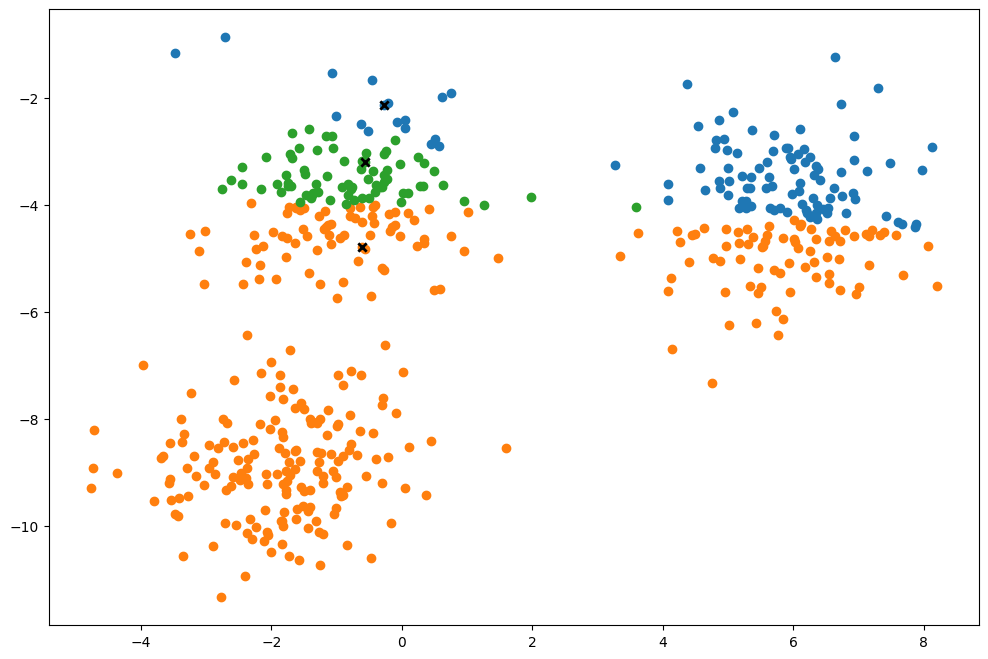

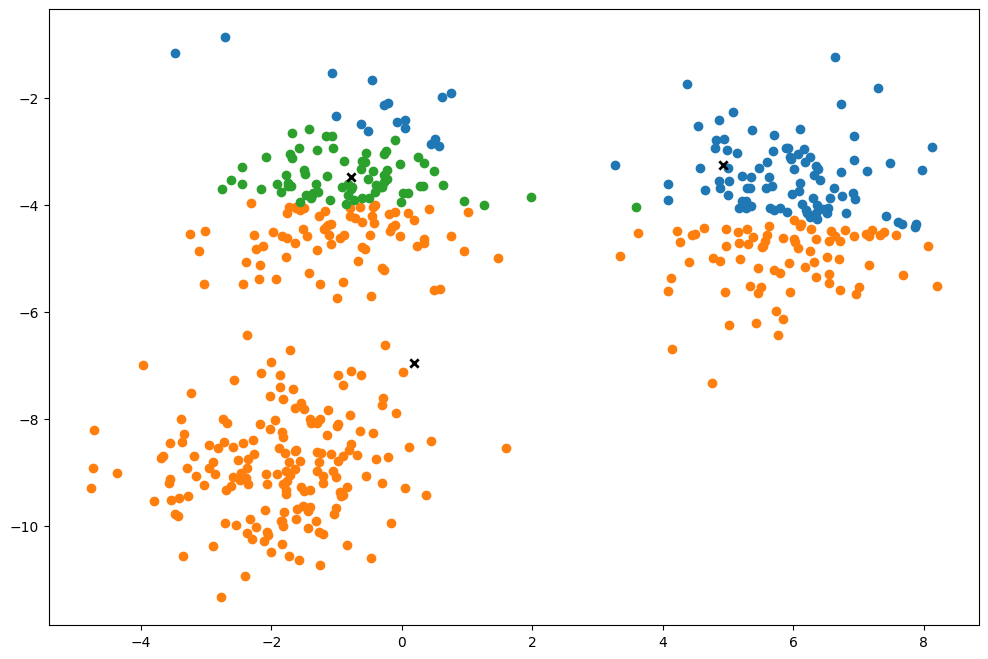

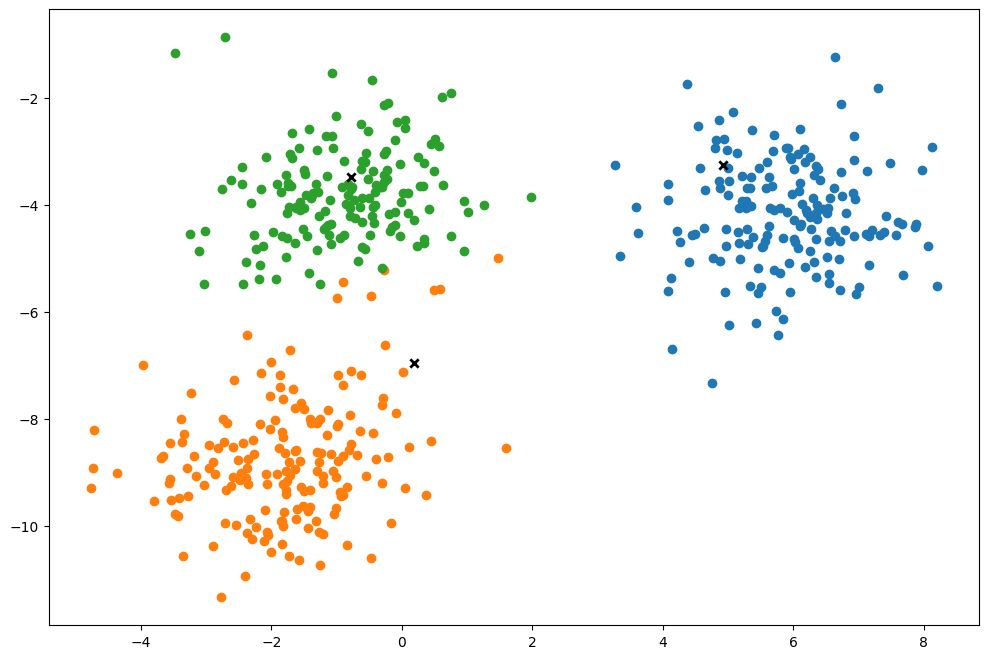

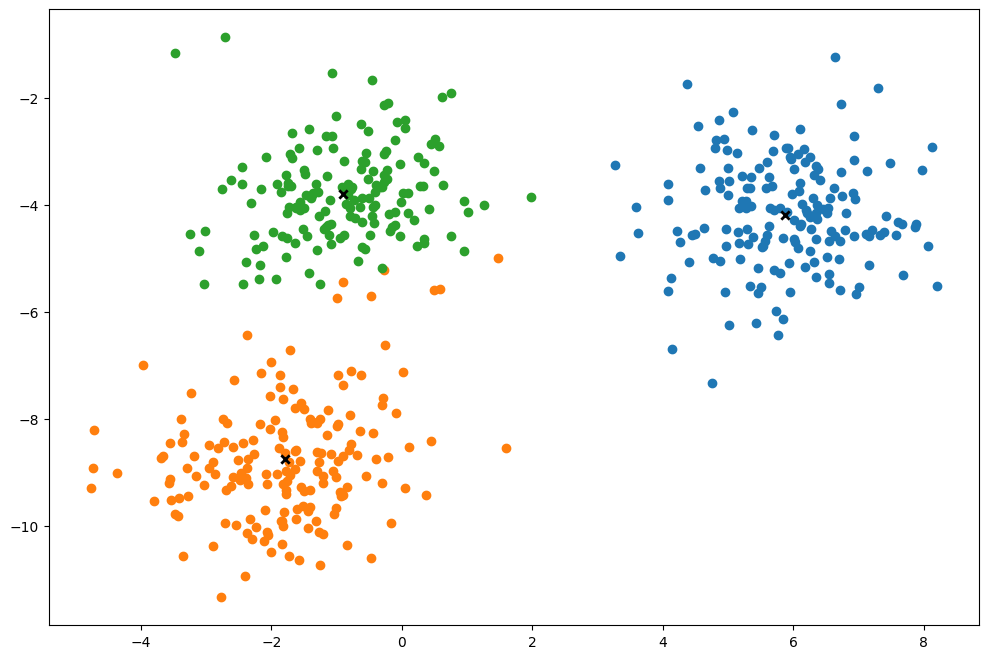

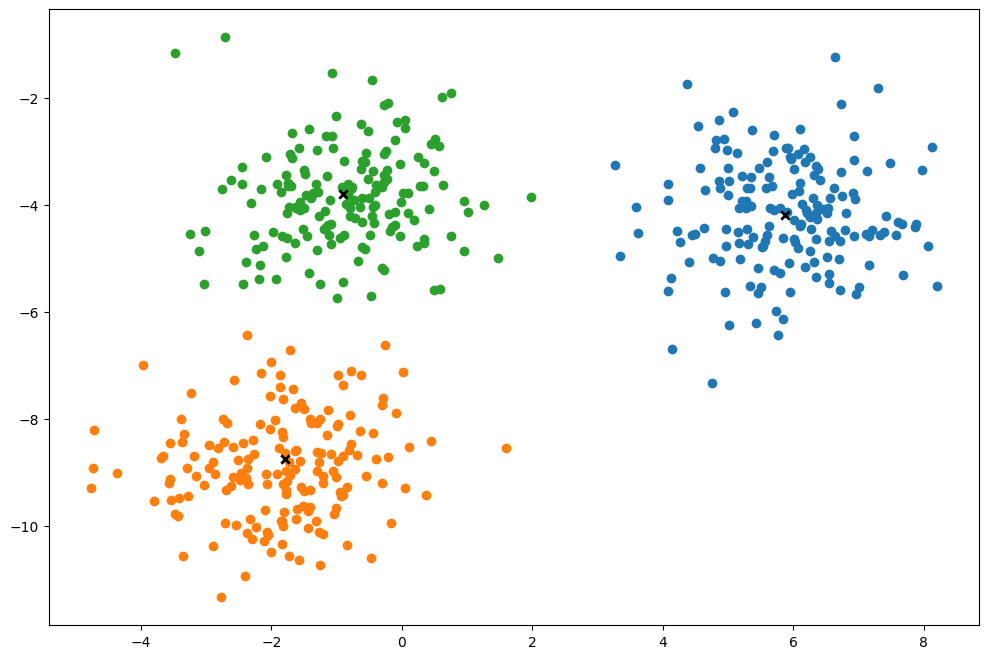

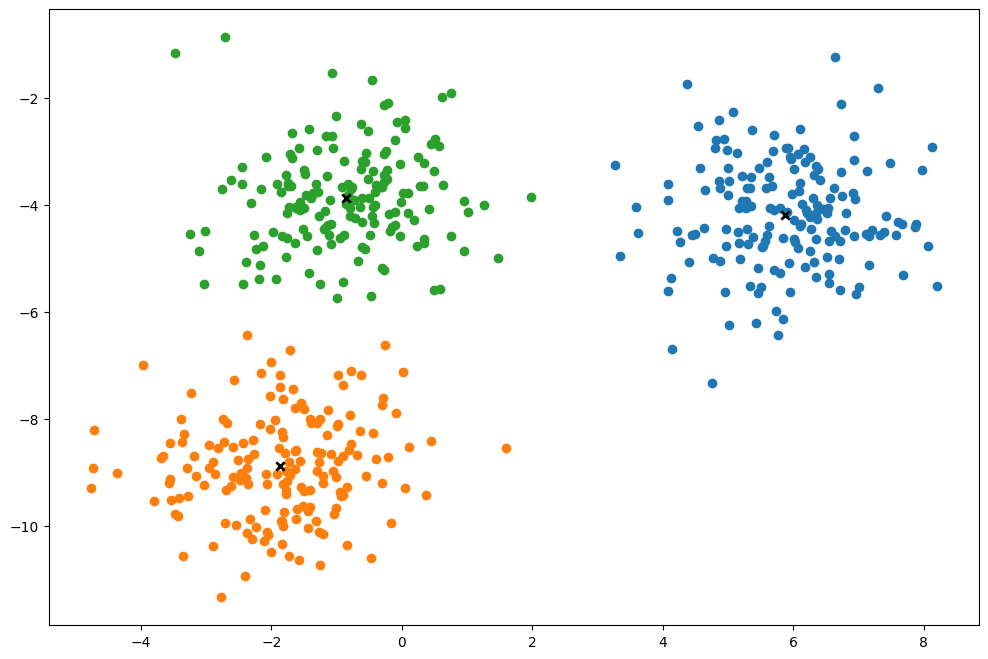

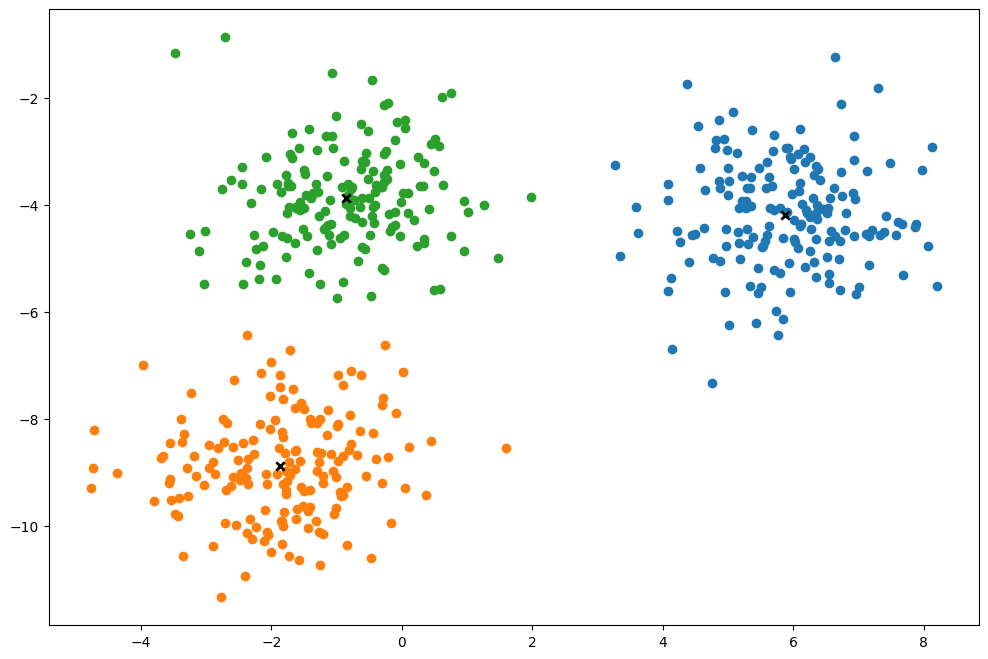

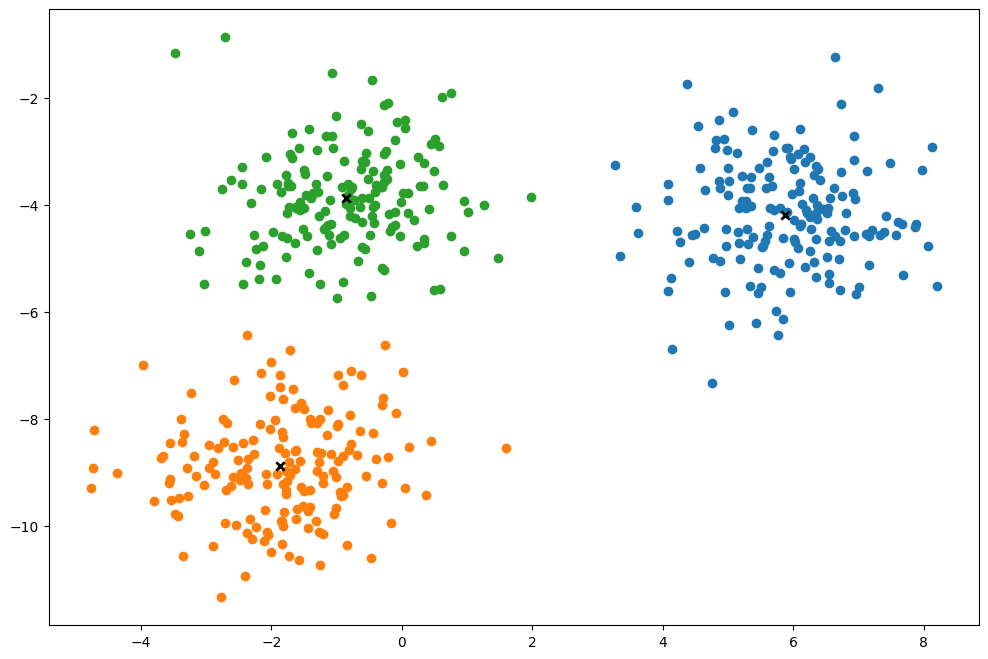

In [76]:
y_pred = k.predict(X)

In [ ]:
k.plot()